In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
url = "data_v3.csv"
df = pd.read_csv(url, header=0)

row_num = df.shape[0]
train_num = int(row_num /3*2)
test_num = -1*int(row_num /3)

col_list = ['side', 'return_t5', "return_t30", "vol_sh_out_pct","stake_pct_chg", "tran_value","mkt_cap", "prev_tran_num","hit_rate_5d", "hit_rate_30d", "hit_rate_90d"]

# Apply Min / Max Scaling
def scaler(col_name):
    df[col_name] = (df[col_name]-df[col_name].min())/ (df[col_name].max()-df[col_name].min())

scaler_list =  [ 'side', 'return_t5', "return_t30", "vol_sh_out_pct","stake_pct_chg", "tran_value", "mkt_cap", "prev_tran_num","hit_rate_5d", "hit_rate_30d", "hit_rate_90d"]

for i in scaler_list:
    scaler(i)

df['return_5d'] = df['return_5d'].replace(-1, 0)
df['return_30d'] = df['return_30d'].replace(-1, 0)
df['return_90d'] = df['return_90d'].replace(-1, 0)

X_train = df[col_list][:train_num].as_matrix()
y_train_5d = df.return_5d[:train_num].as_matrix()
y_train_30d = df.return_30d[:train_num].as_matrix()
y_train_90d = df.return_90d[:train_num].as_matrix()

X_test = df[col_list][test_num:].as_matrix()
y_test_5d = df.return_5d[test_num:].as_matrix()
y_test_30d = df.return_30d[test_num:].as_matrix()
y_test_90d = df.return_90d[test_num:].as_matrix()


C:\Anaconda3\envs\dev_env\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
y_train_5d

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [4]:
X_train

array([[ 0.        ,  0.06914427,  0.06696532, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.06372119,  0.06263999, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.0612489 ,  0.05700162, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 1.        ,  0.06380094,  0.07144512, ...,  0.333     ,
         0.        ,  0.        ],
       [ 1.        ,  0.06531621,  0.06657913, ...,  0.522     ,
         0.761     ,  0.935     ],
       [ 1.        ,  0.067629  ,  0.06943694, ...,  0.534     ,
         0.46      ,  0.548     ]])

In [5]:
X_train.shape

(34481, 11)

In [6]:
X_test.shape

(17240, 11)

In [7]:
# create model
model = Sequential()
model.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))

In [8]:
# Compile model
OPTIMIZER = SGD()
model.compile(loss='binary_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [9]:
# Fit the model
history = model.fit(
    X_train, y_train_90d, epochs=1000, batch_size=128,
    validation_split=0.2,
    verbose=1,
)

Train on 27584 samples, validate on 6897 samples
Epoch 1/1000
27584/27584 [==============================] - 0s 13us/step - loss: 0.6930 - acc: 0.5158 - val_loss: 0.6934 - val_acc: 0.4898
Epoch 2/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6928 - acc: 0.5155 - val_loss: 0.6935 - val_acc: 0.4901
Epoch 3/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6927 - acc: 0.5160 - val_loss: 0.6935 - val_acc: 0.4927
Epoch 4/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6926 - acc: 0.5158 - val_loss: 0.6936 - val_acc: 0.4941
Epoch 5/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6926 - acc: 0.5169 - val_loss: 0.6936 - val_acc: 0.4927
Epoch 6/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6925 - acc: 0.5171 - val_loss: 0.6936 - val_acc: 0.4934
Epoch 7/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6925 - acc: 0.5178 - val_loss: 0.6936 - 

27584/27584 [==============================] - 0s 9us/step - loss: 0.6881 - acc: 0.5388 - val_loss: 0.6921 - val_acc: 0.5114
Epoch 60/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6880 - acc: 0.5392 - val_loss: 0.6920 - val_acc: 0.5114
Epoch 61/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6879 - acc: 0.5390 - val_loss: 0.6920 - val_acc: 0.5112
Epoch 62/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6877 - acc: 0.5397 - val_loss: 0.6919 - val_acc: 0.5108
Epoch 63/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6876 - acc: 0.5394 - val_loss: 0.6918 - val_acc: 0.5112
Epoch 64/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6875 - acc: 0.5397 - val_loss: 0.6917 - val_acc: 0.5111
Epoch 65/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6874 - acc: 0.5397 - val_loss: 0.6916 - val_acc: 0.5125
Epoch 66/1000
27584/27584 [===========

Epoch 118/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6845 - acc: 0.5435 - val_loss: 0.6913 - val_acc: 0.5159
Epoch 119/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6845 - acc: 0.5438 - val_loss: 0.6914 - val_acc: 0.5154
Epoch 120/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6844 - acc: 0.5436 - val_loss: 0.6914 - val_acc: 0.5154
Epoch 121/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6844 - acc: 0.5437 - val_loss: 0.6914 - val_acc: 0.5153
Epoch 122/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6844 - acc: 0.5438 - val_loss: 0.6915 - val_acc: 0.5152
Epoch 123/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6844 - acc: 0.5436 - val_loss: 0.6914 - val_acc: 0.5162
Epoch 124/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6843 - acc: 0.5435 - val_loss: 0.6915 - val_acc: 0.5154
Epoch 125/1000
2

27584/27584 [==============================] - 0s 10us/step - loss: 0.6837 - acc: 0.5438 - val_loss: 0.6917 - val_acc: 0.5173
Epoch 177/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6837 - acc: 0.5438 - val_loss: 0.6918 - val_acc: 0.5173
Epoch 178/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6837 - acc: 0.5438 - val_loss: 0.6917 - val_acc: 0.5188
Epoch 179/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6837 - acc: 0.5438 - val_loss: 0.6916 - val_acc: 0.5188
Epoch 180/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6837 - acc: 0.5436 - val_loss: 0.6917 - val_acc: 0.5191
Epoch 181/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6837 - acc: 0.5437 - val_loss: 0.6917 - val_acc: 0.5191
Epoch 182/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6837 - acc: 0.5439 - val_loss: 0.6918 - val_acc: 0.5181
Epoch 183/1000
27584/27584 [===

27584/27584 [==============================] - 0s 10us/step - loss: 0.6836 - acc: 0.5443 - val_loss: 0.6915 - val_acc: 0.5201
Epoch 235/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6836 - acc: 0.5442 - val_loss: 0.6914 - val_acc: 0.5201
Epoch 236/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6835 - acc: 0.5442 - val_loss: 0.6914 - val_acc: 0.5199
Epoch 237/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6835 - acc: 0.5443 - val_loss: 0.6914 - val_acc: 0.5199
Epoch 238/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6835 - acc: 0.5441 - val_loss: 0.6914 - val_acc: 0.5201
Epoch 239/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6835 - acc: 0.5443 - val_loss: 0.6914 - val_acc: 0.5199
Epoch 240/1000
27584/27584 [==============================] - 0s 10us/step - loss: 0.6835 - acc: 0.5443 - val_loss: 0.6914 - val_acc: 0.5201
Epoch 241/1000
27584/27584 [=

27584/27584 [==============================] - 0s 8us/step - loss: 0.6835 - acc: 0.5441 - val_loss: 0.6910 - val_acc: 0.5205
Epoch 293/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6835 - acc: 0.5440 - val_loss: 0.6909 - val_acc: 0.5205
Epoch 294/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6835 - acc: 0.5439 - val_loss: 0.6909 - val_acc: 0.5210
Epoch 295/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6835 - acc: 0.5438 - val_loss: 0.6909 - val_acc: 0.5208
Epoch 296/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6835 - acc: 0.5439 - val_loss: 0.6909 - val_acc: 0.5207
Epoch 297/1000
27584/27584 [==============================] - 0s 9us/step - loss: 0.6835 - acc: 0.5440 - val_loss: 0.6909 - val_acc: 0.5208
Epoch 298/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6835 - acc: 0.5438 - val_loss: 0.6910 - val_acc: 0.5205
Epoch 299/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6834 - acc: 0.5442 - val_loss: 0.6908 - val_acc: 0.5201
Epoch 351/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6834 - acc: 0.5444 - val_loss: 0.6908 - val_acc: 0.5208
Epoch 352/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6834 - acc: 0.5443 - val_loss: 0.6908 - val_acc: 0.5208
Epoch 353/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6834 - acc: 0.5442 - val_loss: 0.6908 - val_acc: 0.5208
Epoch 354/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6834 - acc: 0.5444 - val_loss: 0.6907 - val_acc: 0.5212
Epoch 355/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6834 - acc: 0.5441 - val_loss: 0.6908 - val_acc: 0.5211
Epoch 356/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6834 - acc: 0.5445 - val_loss: 0.6907 - val_acc: 0.5212
Epoch 357/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6834 - acc: 0.5444 - val_loss: 0.6908 - val_acc: 0.5211
Epoch 409/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6834 - acc: 0.5442 - val_loss: 0.6908 - val_acc: 0.5211
Epoch 410/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6834 - acc: 0.5442 - val_loss: 0.6908 - val_acc: 0.5208
Epoch 411/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6833 - acc: 0.5443 - val_loss: 0.6908 - val_acc: 0.5208
Epoch 412/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6834 - acc: 0.5442 - val_loss: 0.6908 - val_acc: 0.5212
Epoch 413/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6834 - acc: 0.5441 - val_loss: 0.6908 - val_acc: 0.5208
Epoch 414/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6834 - acc: 0.5444 - val_loss: 0.6908 - val_acc: 0.5210
Epoch 415/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6833 - acc: 0.5440 - val_loss: 0.6907 - val_acc: 0.5204
Epoch 467/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6833 - acc: 0.5440 - val_loss: 0.6907 - val_acc: 0.5208
Epoch 468/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6833 - acc: 0.5440 - val_loss: 0.6908 - val_acc: 0.5211
Epoch 469/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6833 - acc: 0.5442 - val_loss: 0.6908 - val_acc: 0.5208
Epoch 470/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6833 - acc: 0.5443 - val_loss: 0.6907 - val_acc: 0.5208
Epoch 471/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6833 - acc: 0.5441 - val_loss: 0.6907 - val_acc: 0.5210
Epoch 472/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6833 - acc: 0.5439 - val_loss: 0.6907 - val_acc: 0.5210
Epoch 473/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6833 - acc: 0.5440 - val_loss: 0.6908 - val_acc: 0.5208
Epoch 525/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6833 - acc: 0.5444 - val_loss: 0.6907 - val_acc: 0.5210
Epoch 526/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6833 - acc: 0.5443 - val_loss: 0.6907 - val_acc: 0.5208
Epoch 527/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6833 - acc: 0.5444 - val_loss: 0.6907 - val_acc: 0.5205
Epoch 528/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6833 - acc: 0.5440 - val_loss: 0.6907 - val_acc: 0.5208
Epoch 529/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6833 - acc: 0.5440 - val_loss: 0.6907 - val_acc: 0.5208
Epoch 530/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6833 - acc: 0.5442 - val_loss: 0.6908 - val_acc: 0.5210
Epoch 531/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6833 - acc: 0.5440 - val_loss: 0.6907 - val_acc: 0.5210
Epoch 583/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6833 - acc: 0.5442 - val_loss: 0.6907 - val_acc: 0.5208
Epoch 584/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6832 - acc: 0.5439 - val_loss: 0.6907 - val_acc: 0.5208
Epoch 585/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6832 - acc: 0.5441 - val_loss: 0.6907 - val_acc: 0.5210
Epoch 586/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6833 - acc: 0.5442 - val_loss: 0.6907 - val_acc: 0.5208
Epoch 587/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6832 - acc: 0.5443 - val_loss: 0.6907 - val_acc: 0.5207
Epoch 588/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6833 - acc: 0.5440 - val_loss: 0.6907 - val_acc: 0.5207
Epoch 589/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6832 - acc: 0.5444 - val_loss: 0.6907 - val_acc: 0.5204
Epoch 641/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6832 - acc: 0.5440 - val_loss: 0.6907 - val_acc: 0.5208
Epoch 642/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6832 - acc: 0.5441 - val_loss: 0.6908 - val_acc: 0.5208
Epoch 643/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6832 - acc: 0.5442 - val_loss: 0.6908 - val_acc: 0.5210
Epoch 644/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6832 - acc: 0.5440 - val_loss: 0.6907 - val_acc: 0.5208
Epoch 645/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6832 - acc: 0.5442 - val_loss: 0.6907 - val_acc: 0.5207
Epoch 646/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6832 - acc: 0.5441 - val_loss: 0.6907 - val_acc: 0.5210
Epoch 647/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6832 - acc: 0.5440 - val_loss: 0.6908 - val_acc: 0.5211
Epoch 699/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6832 - acc: 0.5441 - val_loss: 0.6908 - val_acc: 0.5211
Epoch 700/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6832 - acc: 0.5441 - val_loss: 0.6907 - val_acc: 0.5207
Epoch 701/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6832 - acc: 0.5439 - val_loss: 0.6907 - val_acc: 0.5207
Epoch 702/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6832 - acc: 0.5439 - val_loss: 0.6908 - val_acc: 0.5210
Epoch 703/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6832 - acc: 0.5442 - val_loss: 0.6907 - val_acc: 0.5211
Epoch 704/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6832 - acc: 0.5439 - val_loss: 0.6907 - val_acc: 0.5211
Epoch 705/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6831 - acc: 0.5443 - val_loss: 0.6909 - val_acc: 0.5210
Epoch 757/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6831 - acc: 0.5440 - val_loss: 0.6909 - val_acc: 0.5210
Epoch 758/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6831 - acc: 0.5440 - val_loss: 0.6909 - val_acc: 0.5208
Epoch 759/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6831 - acc: 0.5441 - val_loss: 0.6909 - val_acc: 0.5207
Epoch 760/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6831 - acc: 0.5442 - val_loss: 0.6909 - val_acc: 0.5204
Epoch 761/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6831 - acc: 0.5440 - val_loss: 0.6909 - val_acc: 0.5202
Epoch 762/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6831 - acc: 0.5440 - val_loss: 0.6909 - val_acc: 0.5208
Epoch 763/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6830 - acc: 0.5442 - val_loss: 0.6911 - val_acc: 0.5201
Epoch 815/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6830 - acc: 0.5442 - val_loss: 0.6911 - val_acc: 0.5204
Epoch 816/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6830 - acc: 0.5442 - val_loss: 0.6911 - val_acc: 0.5204
Epoch 817/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6830 - acc: 0.5440 - val_loss: 0.6911 - val_acc: 0.5204
Epoch 818/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6830 - acc: 0.5436 - val_loss: 0.6911 - val_acc: 0.5201
Epoch 819/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6830 - acc: 0.5440 - val_loss: 0.6911 - val_acc: 0.5202
Epoch 820/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6830 - acc: 0.5442 - val_loss: 0.6911 - val_acc: 0.5202
Epoch 821/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6830 - acc: 0.5440 - val_loss: 0.6913 - val_acc: 0.5204
Epoch 873/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6830 - acc: 0.5443 - val_loss: 0.6912 - val_acc: 0.5204
Epoch 874/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6830 - acc: 0.5443 - val_loss: 0.6912 - val_acc: 0.5202
Epoch 875/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6830 - acc: 0.5441 - val_loss: 0.6911 - val_acc: 0.5210
Epoch 876/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6830 - acc: 0.5442 - val_loss: 0.6912 - val_acc: 0.5204
Epoch 877/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6830 - acc: 0.5443 - val_loss: 0.6912 - val_acc: 0.5204
Epoch 878/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6830 - acc: 0.5442 - val_loss: 0.6911 - val_acc: 0.5211
Epoch 879/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6829 - acc: 0.5442 - val_loss: 0.6913 - val_acc: 0.5202
Epoch 931/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6829 - acc: 0.5444 - val_loss: 0.6912 - val_acc: 0.5211
Epoch 932/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6829 - acc: 0.5441 - val_loss: 0.6912 - val_acc: 0.5208
Epoch 933/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6829 - acc: 0.5443 - val_loss: 0.6912 - val_acc: 0.5210
Epoch 934/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6829 - acc: 0.5441 - val_loss: 0.6912 - val_acc: 0.5205
Epoch 935/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6829 - acc: 0.5442 - val_loss: 0.6912 - val_acc: 0.5205
Epoch 936/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6829 - acc: 0.5441 - val_loss: 0.6913 - val_acc: 0.5204
Epoch 937/1000
27584/27584 [=======

27584/27584 [==============================] - 0s 8us/step - loss: 0.6829 - acc: 0.5443 - val_loss: 0.6913 - val_acc: 0.5204
Epoch 989/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6829 - acc: 0.5440 - val_loss: 0.6913 - val_acc: 0.5211
Epoch 990/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6829 - acc: 0.5440 - val_loss: 0.6912 - val_acc: 0.5212
Epoch 991/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6829 - acc: 0.5439 - val_loss: 0.6913 - val_acc: 0.5210
Epoch 992/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6829 - acc: 0.5440 - val_loss: 0.6913 - val_acc: 0.5204
Epoch 993/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6829 - acc: 0.5440 - val_loss: 0.6913 - val_acc: 0.5204
Epoch 994/1000
27584/27584 [==============================] - 0s 8us/step - loss: 0.6829 - acc: 0.5442 - val_loss: 0.6913 - val_acc: 0.5205
Epoch 995/1000
27584/27584 [=======

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BF23CD72B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002BF24559B00>]], dtype=object)

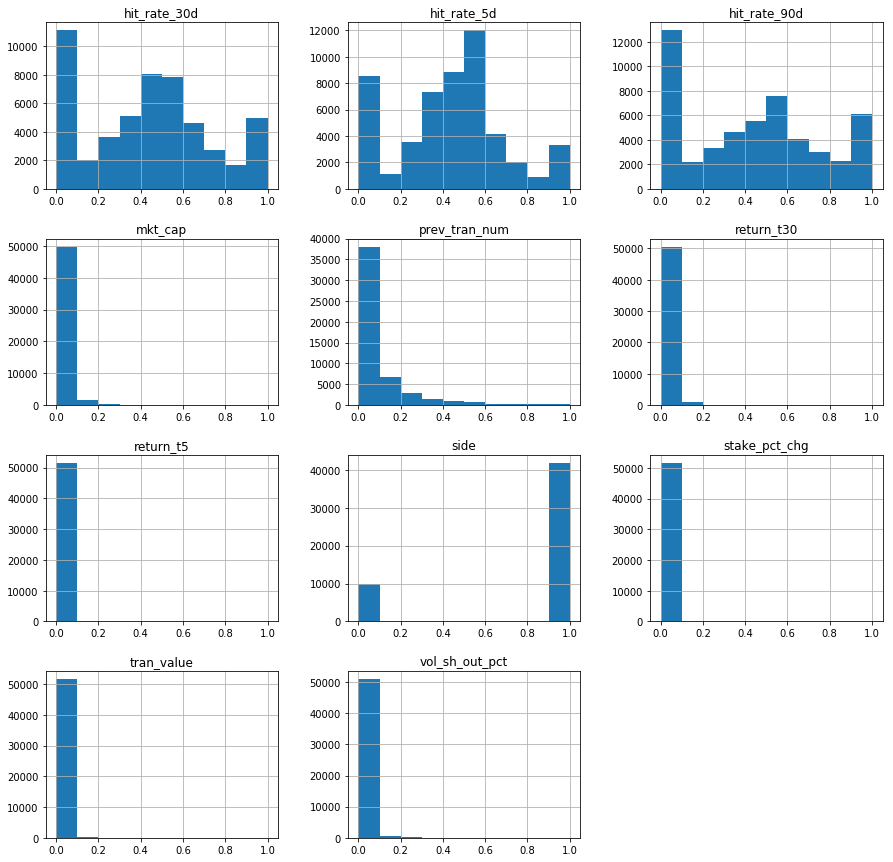

In [10]:
df[col_list].hist(figsize = [15,15])

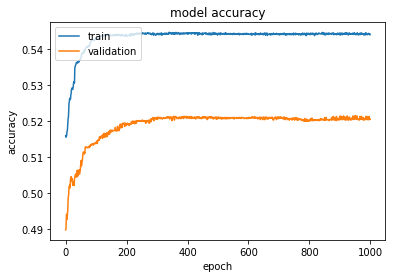

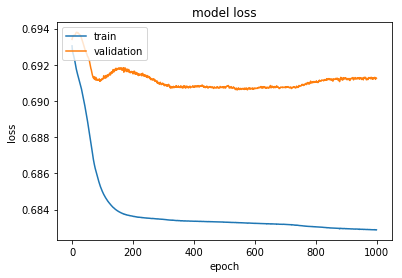

In [11]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
# evaluate the model
scores = model.evaluate(X_train, y_train_90d)
print("[Train] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

scores = model.evaluate(X_test, y_test_90d)
print("[Test] %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

34481/34481 [==============================] - 1s 15us/step
[Train] acc: 53.93%
17240/17240 [==============================] - 0s 15us/step
[Test] acc: 49.58%
